In [1]:
import findspark
findspark.init()
import time

import matplotlib.pyplot as plt
%matplotlib inline
from pyspark import SparkContext
from pyspark.streaming import StreamingContext
import pandas
from IPython import display

from pyspark.mllib.linalg import Vectors
from pyspark.mllib.regression import LabeledPoint
from pyspark.mllib.clustering import StreamingKMeans

sc = SparkContext("local[2]", "StreamingKMEANS")
sc.setLogLevel("ERROR")
ssc = StreamingContext(sc, 1)
puerto = 11136 #port numner

# We receive the datastream and create the vector needed as input for the StreamingKmeans
StreamingData = ssc.socketTextStream("localhost", puerto)
trainingStream = StreamingData.map(lambda line: Vectors.dense([float(x) for x in line.strip().split(' ')]))

# We create a model with random clusters and specify the number of clusters to find and the decay factor
model = StreamingKMeans(k=5, decayFactor=0.5).setRandomCenters(2, 1.0, 0)

# We train the model using the trainingStream
model.trainOn(trainingStream)

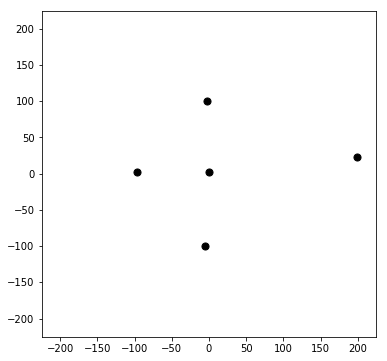

KeyboardInterrupt: 

In [2]:
ssc.start()

while True:
    #print("Cluster centers: " + str(model.latestModel().centers))
    centers = model.latestModel().centers
    center_x=[]
    center_y=[]
    for center in centers:
        center_x=center_x + [center[0]]
        center_y=center_y + [center[1]]
    
    display.clear_output(wait=True)
    plt.figure(figsize=(6,6))
    plt.scatter(center_x, center_y, c='black', s=50, alpha=1)
    plt.xlim(-225,  225)
    plt.ylim(-225,  225)
    plt.pause(0.10)
    time.sleep(0.10)

ssc.awaitTermination()    

In [ ]:
ssc.stop()